In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
#24h dietary recall data
df = pd.read_excel('../data/raw_data/Aggregated_by_IR_id_dailyintake.xlsx')
result = df.groupby('Participant_ID')['intake_response_date'].nunique()
result_df = result.reset_index(name='unique_intake_dates_count')
print("#24h dietary recall data:", np.round(result_df['unique_intake_dates_count'].mean(),2), '+-',
      np.round(result_df['unique_intake_dates_count'].std(),2))

# excessive reporting by participant 1565
result_df[result_df['unique_intake_dates_count'] == result_df['unique_intake_dates_count'].max()]
df[df['Participant_ID'] == 1565].sort_values(by=['intake_response_date'], inplace=False)#.to_csv('../data/participant_1565.csv', index=False)

#24h dietary recall data: 10.35 +- 6.16


,intake_response_id,Participant_ID,CID,intake_response_date,intake_protein,intake_fat,intake_carbohydrate,intake_energy_kj,intake_alcohol,intake_fibre_insoluble,...,NaN,intake_nmes,intake_intrinsic_sugars,intake_other_sugars,intake_satd_fa,intake_cholesterol,intake_fructose,intake_glucose,intake_starch,intake_sucrose
14217,5d2421ca-0727-4b49-a3d9-4c0de47ba19c,1565.0,1.0,2017-12-11 14:24:09,103.527,75.375,242.361,9675.4500,33.158,0,...,NaN,23.810,35.250,0.0,23.3530,697.32,17.920,19.020,146.325,18.420
14210,20dab160-c950-4cc3-8e14-c303e43bda7a,1565.0,1.0,2017-12-11 14:52:48,121.592,97.393,261.520,10805.7800,21.570,0,...,NaN,29.520,27.790,0.0,37.6450,736.98,12.650,13.750,142.980,26.790
14223,7320ebe0-650f-4624-a0e9-42ab02e2551f,1565.0,1.0,2017-12-12 23:20:50,110.814,50.123,71.490,5180.6800,9.340,0,...,NaN,9.500,5.580,0.0,18.7900,736.08,2.390,2.990,52.650,7.190
14259,fa045f5c-e4b8-4b20-b3bf-bf7b78926f39,1565.0,1.0,2017-12-13 23:28:21,93.686,91.358,145.804,8024.0700,20.660,0,...,NaN,9.500,12.280,0.0,33.9310,735.14,2.420,3.160,93.390,7.280
14229,8ea2d43c-7837-4202-88b8-419c29f43d8a,1565.0,1.0,2017-12-14 21:07:21,101.945,90.168,153.788,8310.5700,18.680,0,...,NaN,6.732,3.298,0.0,34.7528,251.24,2.342,2.276,92.005,4.992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14291,335ceb3c-8c94-4ac8-965e-64842efefa26,1565.0,3.0,2018-10-16 22:29:32,92.520,93.970,163.740,8330.4300,12.570,0,...,NaN,14.100,2.570,0.0,35.9100,566.18,2.300,2.840,79.130,11.530
14292,9ab1c022-59ef-489c-a7f3-18e3823e28eb,1565.0,3.0,2018-11-22 00:02:44,89.810,69.010,133.770,7238.4500,25.140,0,...,NaN,0.000,1.390,0.0,21.5600,705.83,0.000,0.000,84.820,0.920
14294,c049e6b3-899a-43e2-9be1-d0332296d8a1,1565.0,3.0,2018-12-10 10:30:10,51.780,116.970,189.920,9108.9501,18.870,0,...,NaN,18.720,8.580,0.0,67.8100,426.73,1.530,1.890,93.670,23.360
14293,a8f70e66-6d92-4c04-8661-427145cd1b77,1565.0,3.0,2018-12-11 23:58:01,51.240,108.130,150.920,7951.8901,12.570,0,...,NaN,6.330,6.970,0.0,63.1500,369.90,1.530,1.890,80.220,9.880


In [101]:
duration = []
for id in df['Participant_ID'].unique():
    sub_df = df[df['Participant_ID'] == id].sort_values(by=['intake_response_date'])
    sub_df['month_int'] = ((sub_df['intake_response_date'].dt.year - 2017) * 12 + sub_df['intake_response_date'].dt.month - 6).astype(int)
    sub_df['month_int'] -= sub_df['month_int'].min()
    duration.append(sub_df['month_int'].max())

duration = np.array(duration)
sum(duration>15)/len(duration)

0.4511138613861386

In [105]:
df

,Unnamed: 0,participant_id,participant_study_id,CID,centre_id,study_arm_id,study_arm_name,withdrawal_date,has_withdrawn,ecid_cid_date,...,elig_ethnicity_code,elig_ethnicity,elig_height,elig_current_weight,elig_pregnant,ecid_waist,ecid_hip,ecid_sbp,ecid_dbp,ecid_bpm
0,0,149.0,UL_FC_3109,1,1.0,3.0,Self regulation and motivation,NaT,0.0,2017-03-20,...,1.0,White British,1.73,79.0,0.0,79.00,83.500000,116.333333,73.000000,62.666667
2,2,149.0,UL_FC_3109,3,1.0,3.0,Self regulation and motivation,NaT,0.0,2018-04-12,...,NaN,NaN,NaN,NaN,NaN,82.50,101.500000,110.000000,62.500000,58.000000
4,4,150.0,CPH_KRD_5969,1,2.0,2.0,Stress/emotion,NaT,0.0,2017-03-20,...,1.0,Danish/European,1.82,83.0,0.0,89.75,100.250000,120.666667,72.333333,65.666667
6,6,150.0,CPH_KRD_5969,3,2.0,2.0,Stress/emotion,NaT,0.0,2018-03-23,...,NaN,NaN,NaN,NaN,NaN,89.90,96.850000,127.000000,72.000000,55.000000
8,8,151.0,UL_SB_7979,1,1.0,1.0,Control,NaT,0.0,2017-03-20,...,1.0,White British,1.88,107.0,0.0,114.00,107.666667,126.000000,74.000000,55.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6498,6498,1795.0,LIS_LB_6606,3,3.0,3.0,Self regulation and motivation,NaT,0.0,2019-01-23,...,NaN,NaN,NaN,NaN,NaN,83.00,99.250000,115.666667,78.500000,66.500000
6500,6500,1796.0,LIS_SS_4222,1,3.0,3.0,Self regulation and motivation,NaT,0.0,2018-03-13,...,1.0,Choice 1,1.68,91.0,0.0,107.05,113.550000,127.000000,82.333333,91.666667
6502,6502,1796.0,LIS_SS_4222,3,3.0,3.0,Self regulation and motivation,NaT,0.0,2019-01-30,...,NaN,NaN,NaN,NaN,NaN,110.80,118.250000,122.333333,76.500000,97.000000
6504,6504,1797.0,LIS_MR_1914,1,3.0,1.0,Control,NaT,0.0,2018-03-14,...,1.0,Choice 1,1.63,61.0,0.0,74.60,96.500000,95.333333,55.333333,65.000000


4

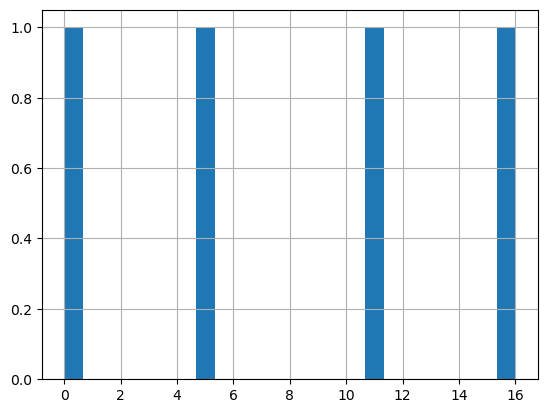

In [107]:
df = pd.read_excel('../data/raw_data/outcomes_reformatted.xlsx')
df = df[df['ecid_waist'].notna()]
sub_df = df[df['participant_id'] == 1565].sort_values(by=['ecid_cid_date'])
sub_df['month'] = pd.to_datetime(sub_df['ecid_cid_date']).dt.to_period('M')
sub_df['month_int'] = ((sub_df['ecid_cid_date'].dt.year - 2017) * 12 + sub_df['ecid_cid_date'].dt.month - 6).astype(int)
sub_df['month_int'] -= sub_df['month_int'].min()
sub_df['month_int'].hist(bins=24)
sub_df['month_int'].nunique()

In [95]:
duration = []
for id in df['participant_id'].unique():
    sub_df = df[df['participant_id'] == id].sort_values(by=['ecid_cid_date'])
    sub_df['month'] = pd.to_datetime(sub_df['ecid_cid_date']).dt.to_period('M')
    sub_df['month_int'] = ((sub_df['ecid_cid_date'].dt.year - 2017) * 12 + sub_df['ecid_cid_date'].dt.month - 6).astype(int)
    sub_df['month_int'] -= sub_df['month_int'].min()
    print(sub_df['month_int'].unique())
    duration.append(sub_df['month_int'].max())
duration = np.array(duration)
print(np.round(sum(duration>0)/len(duration),2),"% went to the second visit")



[ 0 13]
[ 0 12]
[ 0 12]
[0]
[0]
[ 0 11]
[ 0 13]
[ 0 12]
[ 0 11]
[0]
[ 0 13]
[ 0 13]
[ 0 11]
[0]
[ 0 12]
[0]
[0]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[0]
[ 0 14]
[ 0 11]
[0]
[ 0 11]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 13]
[ 0 12]
[ 0 12]
[ 0 12]
[0]
[ 0 13]
[0]
[ 0 11]
[0]
[ 0 12]
[ 0 12]
[0]
[ 0 11]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[0]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 13]
[ 0 12]
[ 0 11]
[0]
[ 0 11]
[ 0 11]
[ 0 11]
[0]
[ 0 11]
[ 0 11]
[ 0 11]
[ 0 12]
[ 0 12]
[ 0 11]
[ 0 12]
[ 0 13]
[0]
[ 0 11]
[0]
[ 0 13]
[ 0 11]
[0]
[ 0 11]
[ 0 11]
[ 0 12]
[ 0 12]
[ 0 12]
[0]
[0]
[ 0 12]
[0]
[0]
[0]
[ 0 12]
[ 0 11]
[ 0 11]
[ 0 11]
[0 9]
[ 0 11]
[ 0 11]
[0]
[ 0 12]
[ 0 12]
[ 0 12]
[0]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[0]
[ 0 12]
[0]
[ 0 13]
[ 0 12]
[ 0 12]
[0]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 12]
[ 0 11]
[0]
[ 0 11]
[0]
[ 0 12]
[ 0 11]
[0]
[0]
[ 0 12]
[ 0 12]
[0]
[ 0 11]
[0]
[0]
[ 0 12]
[0]
[ 0 12]
[ 0 11]
[ 0 11]
[ 

0.7225396825396826

In [76]:
df['ecid_ldl'].notna()

0        True
1       False
2        True
3       False
4        True
        ...  
6504     True
6505    False
6506     True
6507    False
6508    False
Name: ecid_ldl, Length: 6509, dtype: bool